In [24]:
# all imports
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np 

# Get COSMOS IRAC Data

In [2]:
# open COSMOS master file and get data 
inf = fits.open('D:\IfA REU\Catalogs\COSMOS2020_CLASSIC_R1_v2.0_master.fits')
data = inf[1].data
cols = inf[1].columns
head = inf[0].header
inf.close()

In [4]:
# IRAC Columns (unit = 'uJy')
ch1 = 'SPLASH_CH1_FLUX' # 3.5686 um
ch2 = 'SPLASH_CH2_FLUX' # 4.5067 um
ch3 = 'SPLASH_CH3_FLUX' # 5.7788 um
ch4 = 'SPLASH_CH4_FLUX' # 7.9958 um 

# get IRAC data
ch1_data = data[ch1]
ch2_data = data[ch2]
ch3_data = data[ch3]
ch4_data = data[ch4]

# info
print('CH1 : \t Min: ', min(ch1_data), '\t Max: ', max(ch1_data), '\t Total: ', len(ch1_data))
print('CH2 : \t Min: ', min(ch2_data), '\t Max: ', max(ch2_data), '\t Total: ', len(ch2_data))
print('CH3 : \t Min: ', min(ch3_data), '\t Max: ', max(ch3_data), '\t Total: ', len(ch3_data))
print('CH4 : \t Min: ', min(ch4_data), '\t Max: ', max(ch4_data), '\t Total: ', len(ch4_data))

CH1 : 	 Min:  -373.86588 	 Max:  11499.407 	 Total:  1720700
CH2 : 	 Min:  -200.00957 	 Max:  12870.739 	 Total:  1720700
CH3 : 	 Min:  -99.9 	 Max:  17447.684 	 Total:  1720700
CH4 : 	 Min:  -99.9 	 Max:  15091.21 	 Total:  1720700


## AGN Selection Criterea (Donley, 2012) 

x = log10 ( f5.8 μm f3.6 μm ), 
y = log10 ( f8.0 μm f4.5 μm ) 

x >= 0.08 AND 
y >= 0.15 AND
y >= (1.21 x) − 0.27 AND
y <= (1.21 x) + 0.27 AND
f4.5 μm > f3.6 μm AND
f5.8 μm > f4.5 μm AND
f8.0 μm > f5.8 μm

In [20]:
# Draw the selection wedge for Donley 2012 
def PlotDonleyWedge() : 
    # constants
    x_min = 0.08    # x >= 0.08
    y_min = 0.15    # y >= 0.15
    max = 10        # arbritrary 

    # calculate intercepts
    x_int_ymin = (y_min + 0.27)/1.21  # intercept between y_min and (y>=1.21x-0.27)
    y_int_xmin = (1.21*x_min) + 0.27  # intercept between x_min and (y>=1.21x+0.27)

    # calculate y_low intercepts (y>=1.21x-0.27)
    y1_low = (1.21*x_int_ymin)  - 0.27   
    y2_low = (1.21*max)         - 0.27

    # calculate y_high intercepts (y>=1.21x+0.27)
    y1_high = (1.21*x_min)      + 0.27
    y2_high = (1.21*max)        + 0.27

    # plot lines between intercepts 
    plt.plot( [x_min,       x_min],         [y_min,     y_int_xmin], 'r')    # x >= 0.08
    plt.plot( [x_min,       x_int_ymin],    [y_min,     y_min],      'r')    # y >= 0.15
    plt.plot( [x_int_ymin,  max],           [y1_low,    y2_low],     'r')    # y >= 1.21x - 0.27
    plt.plot( [x_min,       max],           [y1_high,   y2_high],    'r')    # y <= 1.21x + 0.27

    # name the x and y axis 
    plt.xlabel('log(f_5.8/f_3.6)') 
    plt.ylabel('log(f_8.0/f_4.5)') 

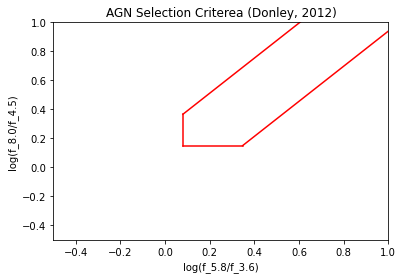

In [34]:
# plot 
PlotDonleyWedge()

# customize plot
plt.axis([-0.5,1,-0.5,1]) 
plt.title('AGN Selection Criterea (Donley, 2012)') 
    
# show the plot 
plt.show()

C:\Users\polar\AppData\Local\Temp\ipykernel_308\662946086.py:2: RuntimeWarning: divide by zero encountered in true_divide
  x = np.log10( ch3_data / ch1_data ) # x = log10 ( f_5.6um / f_3.6um )
C:\Users\polar\AppData\Local\Temp\ipykernel_308\662946086.py:2: RuntimeWarning: invalid value encountered in true_divide
  x = np.log10( ch3_data / ch1_data ) # x = log10 ( f_5.6um / f_3.6um )
C:\Users\polar\AppData\Local\Temp\ipykernel_308\662946086.py:2: RuntimeWarning: divide by zero encountered in log10
  x = np.log10( ch3_data / ch1_data ) # x = log10 ( f_5.6um / f_3.6um )
C:\Users\polar\AppData\Local\Temp\ipykernel_308\662946086.py:2: RuntimeWarning: invalid value encountered in log10
  x = np.log10( ch3_data / ch1_data ) # x = log10 ( f_5.6um / f_3.6um )
C:\Users\polar\AppData\Local\Temp\ipykernel_308\662946086.py:3: RuntimeWarning: divide by zero encountered in true_divide
  y = np.log10( ch4_data / ch2_data ) # y = log10 ( f_8.0um / f_4.5 um )
C:\Users\polar\AppData\Local\Temp\ipykernel

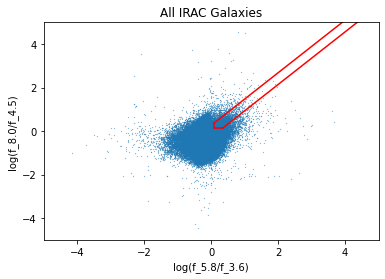

In [38]:
# calculate colors for each galaxy
x = np.log10( ch3_data / ch1_data ) # x = log10 ( f_5.6um / f_3.6um )
y = np.log10( ch4_data / ch2_data ) # y = log10 ( f_8.0um / f_4.5 um )

# plot 
plt.plot(x, y, 'o', markersize=0.2)
PlotDonleyWedge()
plt.axis([-5,5,-5,5]) 
plt.title('All IRAC Galaxies') 
plt.show()